In [370]:
import pandas as pd
pd.set_option('display.max_rows', None)

import plotly.express as px
import chart_studio.tools as tls

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [371]:
q1_path = 'datasets\\Jan-01-2024_Mar-31-2024_4051083528461598.csv'
q2_path = 'datasets\\Apr-01-2024_Jun-30-2024_2758116674392677.csv'
q3_path = 'datasets\\Jul-01-2024_Sep-30-2024_568596229332029.csv'
q4_path = 'datasets\\Oct-01-2024_Dec-30-2024_577241625163342.csv'

q1 = pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

quarters_list = [q1, q2, q3, q4]
int_cols = ['plays', 'follows']
drop_cols = ['post id', 'account id', 'account username', 'account name', 'data comment', 'date']
char_limit = 80

for q in range(len(quarters_list)):
    ## CREATE NEW COL TO REPRESENT QUARTER NUMBER IN A YEAR
    quarters_list[q]['quarter'] = [q+1 for i in range(len(quarters_list[q]))]
    ## MAKE ALL COL NAMES LOWER CASE
    quarters_list[q].columns = [col.lower() for col in quarters_list[q].columns]
    ## CHANGE NaN VALUES TO ZERO (0)
    quarters_list[q].fillna(0,inplace=True)
    ## IF NO followers COL, ADD THE COL
    if 'follows' not in quarters_list[q].columns:
        quarters_list[q]['follows'] = 0
    ## CHANGE DATA TYPE FROM FLOAT TO INT
    quarters_list[q][int_cols] = quarters_list[q][int_cols].astype(int)
    
    
    ## DROP UNNEEDED COLS
    quarters_list[q] = quarters_list[q].drop(drop_cols, axis=1)
    ## RENAME SOME COLS
    quarters_list[q].rename(columns={'duration (sec)': 'duration', 'publish time': 'datetime', 'post type': 'type', 'permalink': 'link'}, inplace=True)
    ## SPLIT VALUES IN 'datetime' TO 'date' AND 'time'
    date = []
    time = []
    for n in quarters_list[q].datetime:
        time.append(n[11:])
        date.append(n[:-6])
    quarters_list[q] = quarters_list[q].drop(['datetime'], axis=1)
    quarters_list[q]['date'] = date
    quarters_list[q]['time'] = time
    ## ONLY SHOW FIRST <char_limit> CHARACTERS OF description
    for j in range(len(quarters_list[q].description)):
        quarters_list[q].loc[j, 'description'] = quarters_list[q].description[j][:char_limit] + ' ...'
    ## FORMAT date VALUES
    for d in range(len(quarters_list[q].date)):
        mm = quarters_list[q].date[d][:2]
        dd = quarters_list[q].date[d][3:5]
        yyyy = quarters_list[q].date[d][6:10]
        quarters_list[q].loc[d, 'date'] = f'{yyyy}-{mm}-{dd}'
    ## SORT BY DATE
    quarters_list[q] = quarters_list[q].sort_values(by='date', ascending=True)

## ASSIGN NEW QUARTER DATAFRAMES
q1_clean = quarters_list[0]
q2_clean = quarters_list[1]
q3_clean = quarters_list[2]
q4_clean = quarters_list[3]


## COMBINE ALL QUARTER DATAFRAMES INTO ONE
df = pd.concat(quarters_list)
# df.head()

In [545]:
image_posts = df[df.type=='IG image']
carousel_posts = df[df.type=='IG carousel']
reel_posts = df[df.type=='IG reel']

content_dict = {'all': df, 'image': image_posts, 'carousel': carousel_posts, 'reel': reel_posts}
content_types = list(content_dict.keys())
top_5_display = ['description','type', 'date', 'reach', 'likes', 'comments','saves','follows','link']

In 2024, you made a total of 132 posts on Instagram.
	- That is about 11 posts per month.
	- That is about 3 posts per week.



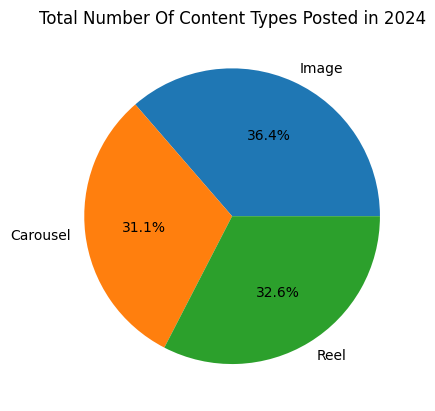

In [543]:
## PIE CHART ON TOTAL NUM OF CONTENT TYPES POSTED
content_type_counts = {'type': ['Image','Carousel','Reel'],
                        'count': [len(image_posts), len(carousel_posts), len(reel_posts)]}
content_type_counts = pd.DataFrame(content_type_counts)

fig3, ax3 = plt.subplots()
ax3.pie(content_type_counts['count'], labels=content_type_counts['type'],
       autopct='%1.1f%%')
plt.title("Total Number Of Content Types Posted in 2024")
# plt.savefig('totalNumContentTypes.jpg')

print(f'In 2024, you made a total of {len(df)} posts on Instagram.\n\t- That is about {round(len(df)/12)} posts per month.\n\t- That is about {round((len(df)/12)/4)} posts per week.\n')

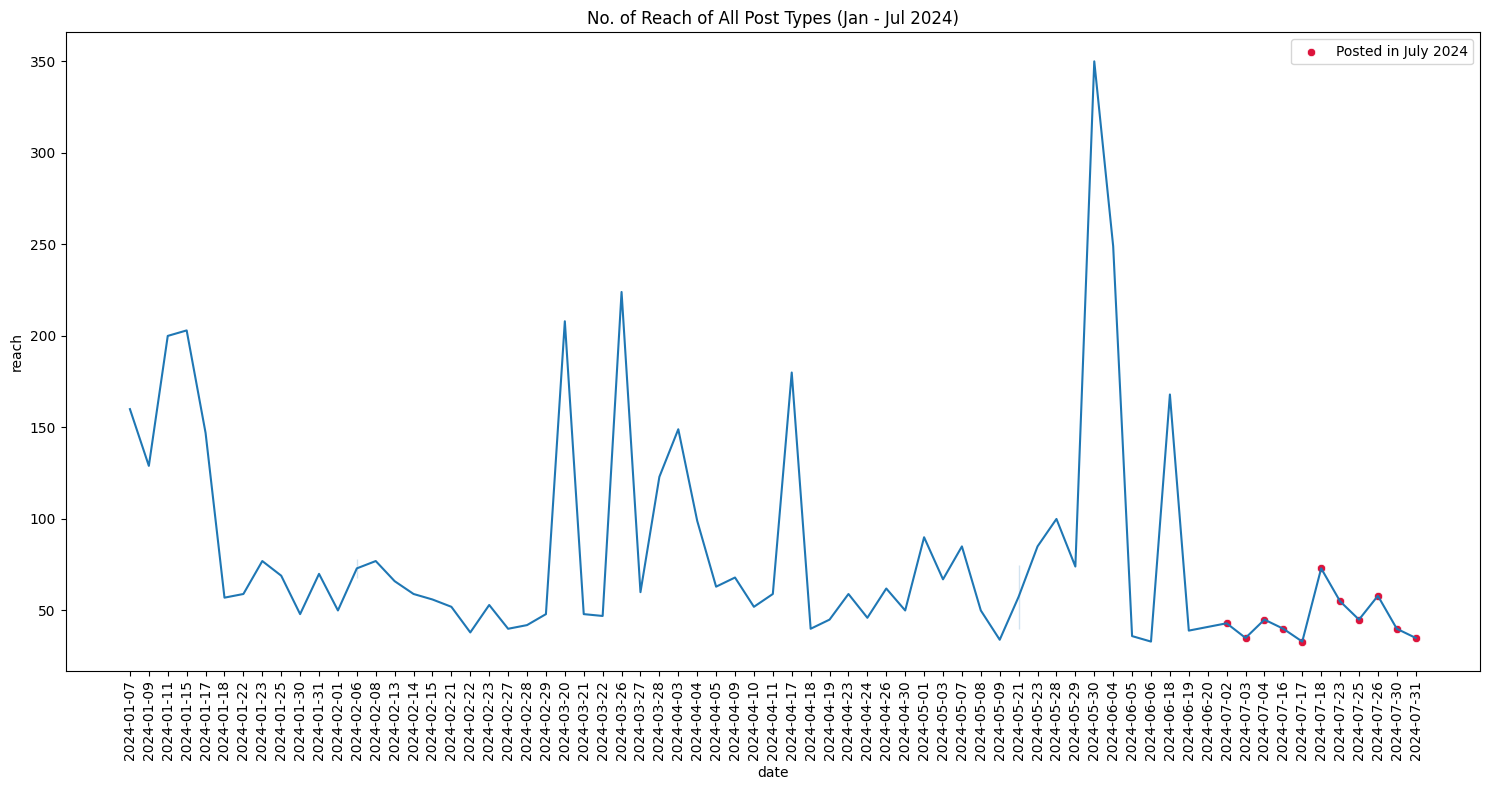

In [544]:
## REACH OF EVERY POST TYPE IN 2024
metrics = ['reach','comments','saves','follows', 'likes']

## HIGHLIGHT POSTS IN JULY
jul_rows = q3_clean[q3_clean['date'].str.contains('2024-07')]

## DROP ROWS THAT ARE LATER THAN JUL
before_aug_df = pd.concat([q1_clean, q2_clean, jul_rows])

## EDIT LINE CHART
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.title('No. of Reach of All Post Types (Jan - Jul 2024)')

## SHOW LINE CHART WITH HIGHLIGHT
ax = sns.lineplot(data=before_aug_df, x="date", y="reach")
sns.scatterplot(data=jul_rows, x="date", y="reach", color="crimson", label="Posted in July 2024", ax=ax)
plt.tight_layout()
plt.show()

sns1 = ax.get_figure()
sns1.savefig("reach_of_every_post_janToJul.jpg")

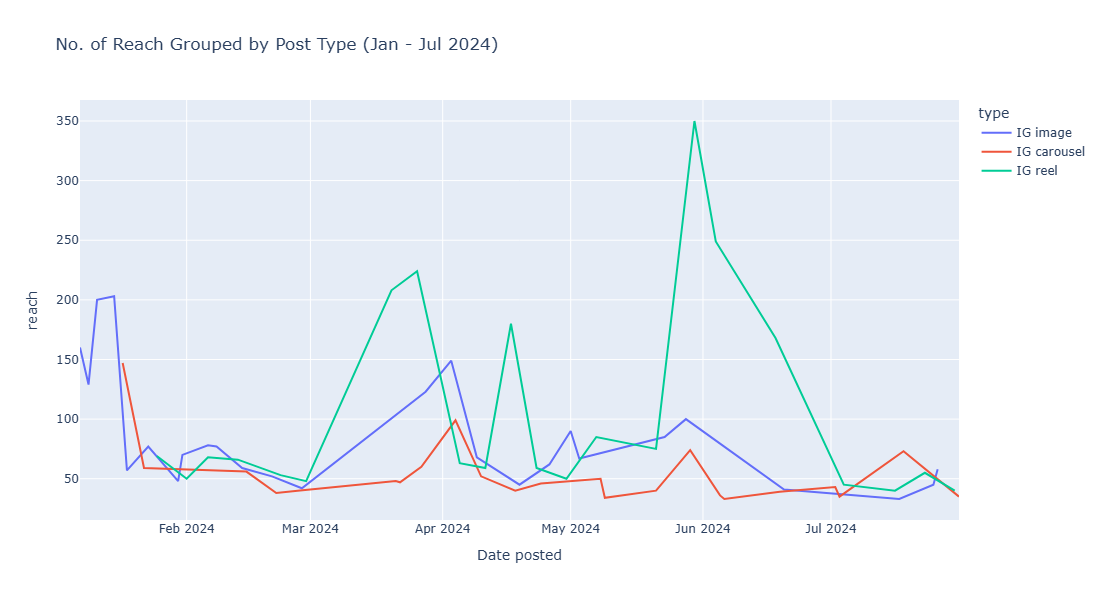


From January to July 2024, the top 5 best performing posts are:


,description,type,date,reach,likes,comments,saves,follows,link
1,Ever felt overwhelmed running your startup? I’...,IG reel,2024-05-30,350,16,0,1,2,https://www.instagram.com/reel/C7lxUAeNsPS/
2,More decision-makers can mean more delays in i...,IG reel,2024-06-04,249,6,0,0,0,https://www.instagram.com/reel/C7ypRsnN1c6/
3,The REAL secret to skyrocketing conversions li...,IG reel,2024-03-26,224,7,1,0,0,https://www.instagram.com/reel/C4-ZsqOrLn0/
4,… But why do I still do what I do? 😵‍💫\n\nI’ve...,IG reel,2024-03-20,208,13,0,0,2,https://www.instagram.com/reel/C4u88aYrevL/
5,Ever feel like web design is a language only d...,IG image,2024-01-15,203,17,3,0,0,https://www.instagram.com/p/C2JTEDOI4Cb/


In [546]:
## LINE CHART OF REACH FOR ALL CONTENT TYPES
fig4 = px.line(before_aug_df, x='date', y='reach', color='type',
         width=1100, height=600,
         labels={
                 "date": "Date posted",
                 "value": "No. of reach",
                 "variable": "No. of reach"
             },
          title=f"No. of Reach Grouped by Post Type (Jan - Jul 2024)",
          custom_data=['type','description', 'link'])

fig4.update_traces(mode="lines",
                 hovertemplate="<br>".join([
                    "%{y}",
                    "Date: %{x}",
                    "Type: %{customdata[0]}",
                    "Desc: %{customdata[1]}",
                    "Link: %{customdata[2]}"
                ]))
fig4.update_layout(hovermode="x unified")

fig4.show()

print('\nFrom January to July 2024, the top 5 best performing posts are:')

before_aug_best = before_aug_df.sort_values(by='reach', ascending=False)[top_5_display].head()
before_aug_best.index = [f+1 for f in range(len(before_aug_best))]

before_aug_best

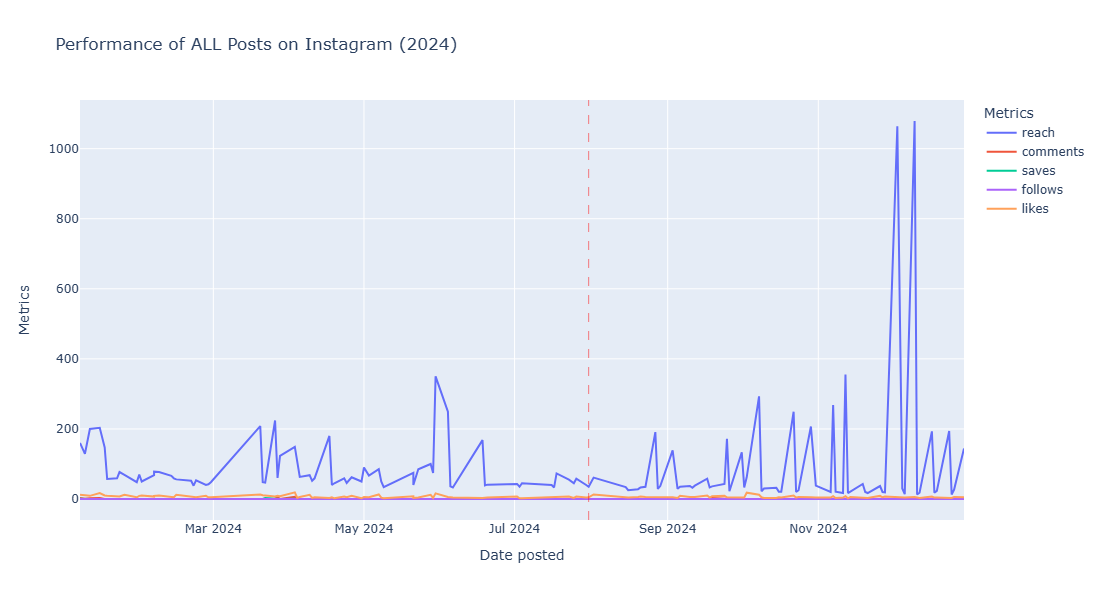


Top 5 Performing ALL Posts:


,description,type,date,reach,likes,comments,saves,follows,link
1,Read more 👇\n\nI’ll not be writing about busin...,IG reel,2024-12-10,1079,6,0,0,0,https://www.instagram.com/reel/DDZTfvEvCnj/
2,Read more 👇\n\nWhen creatives launch a busines...,IG reel,2024-12-03,1064,6,0,0,0,https://www.instagram.com/reel/DDHR-0EvJ0w/
3,Read more 👇🏽\n\nWe make hundreds of decisions ...,IG reel,2024-11-12,355,8,0,0,0,https://www.instagram.com/reel/DCRObFxPzdM/
4,Ever felt overwhelmed running your startup? I’...,IG reel,2024-05-30,350,16,0,1,2,https://www.instagram.com/reel/C7lxUAeNsPS/
5,"Read more 👇🏽\n\nOne year ago, I heard the term...",IG reel,2024-10-08,293,12,0,0,0,https://www.instagram.com/reel/DA3FZ94hFhQ/



Top 5 Performing IMAGE Posts:


,description,type,date,reach,likes,comments,saves,follows,link
1,Ever feel like web design is a language only d...,IG image,2024-01-15,203,17,3,0,0,https://www.instagram.com/p/C2JTEDOI4Cb/
2,Is your website just a pretty picture on the i...,IG image,2024-01-11,200,9,2,0,0,https://www.instagram.com/p/C19Y7g6scmh/
3,"Welcome to my office, and yes, it is indeed my...",IG image,2024-01-07,160,12,3,1,0,https://www.instagram.com/p/C1zPvEdPPfr/
4,This was me going for a startup challenge orga...,IG image,2024-04-03,149,19,6,1,0,https://www.instagram.com/p/C5TAD2WvsLE/
5,Website got you feeling 💀? Don't fret! Squeeze...,IG image,2024-01-09,129,11,1,0,0,https://www.instagram.com/p/C14PUcEqZc9/



Top 5 Performing CAROUSEL Posts:


,description,type,date,reach,likes,comments,saves,follows,link
1,Tired of staring at a website that's about as ...,IG carousel,2024-01-17,147,10,0,0,0,https://www.instagram.com/p/C2NItfGP8Nt/
2,I've noticed a huge reason why tech startups s...,IG carousel,2024-04-04,99,3,0,0,0,https://www.instagram.com/p/C5Vd7j3rPZF/
3,"🚀 Startup owners, want to know a secret?\n\nSo...",IG carousel,2024-05-29,74,3,0,0,0,https://www.instagram.com/p/C7jMfZ9v2n3/
4,What happens when you book a free discovery ca...,IG carousel,2024-07-18,73,7,0,0,0,https://www.instagram.com/p/C9jugIfPIKm/
5,No one tells you about how BORING it is to mai...,IG carousel,2024-03-27,60,9,6,1,0,https://www.instagram.com/p/C5BZ5bAIkrC/



Top 5 Performing REEL Posts:


,description,type,date,reach,likes,comments,saves,follows,link
1,Read more 👇\n\nI’ll not be writing about busin...,IG reel,2024-12-10,1079,6,0,0,0,https://www.instagram.com/reel/DDZTfvEvCnj/
2,Read more 👇\n\nWhen creatives launch a busines...,IG reel,2024-12-03,1064,6,0,0,0,https://www.instagram.com/reel/DDHR-0EvJ0w/
3,Read more 👇🏽\n\nWe make hundreds of decisions ...,IG reel,2024-11-12,355,8,0,0,0,https://www.instagram.com/reel/DCRObFxPzdM/
4,Ever felt overwhelmed running your startup? I’...,IG reel,2024-05-30,350,16,0,1,2,https://www.instagram.com/reel/C7lxUAeNsPS/
5,"Read more 👇🏽\n\nOne year ago, I heard the term...",IG reel,2024-10-08,293,12,0,0,0,https://www.instagram.com/reel/DA3FZ94hFhQ/


In [547]:
metrics = ['reach','comments','saves','follows', 'likes']
# graph_embeds = []

for t in content_types:
    print('\n\n\n\n\n')
    ## LINE CHART
    fig1 = px.line(content_dict[t], x="date", y=metrics,
             width=1100, height=600,
             labels={
                     "date": "Date posted",
                     "value": "Metrics",
                     "variable": "Metrics"
                 },
              title=f"Performance of {t.upper()} Posts on Instagram (2024)",
              custom_data=['type','description', 'link'])

    fig1.update_traces(mode="lines",
                     hovertemplate="<br>".join([
                        "%{y}",
                        "Date: %{x}",
                        "Type: %{customdata[0]}",
                        "Desc: %{customdata[1]}",
                        "Link: %{customdata[2]}"
                    ]))
    fig1.update_layout(hovermode="x unified")

    ## ADD VERTICAL LINE TO SHOW LAST DAY OF JULY 2024
    fig1.add_vline(x='2024-07-31', line_color='red', line_dash='dash', line_width=.5)
    
    # graph_embeds.append(tls.get_embed('https://plotly.com/~chris/1638'))
    fig1.show()


    ## SHOW TOP 5 PERFORMING POSTS
    top_5 = content_dict[t].sort_values(by=metrics, ascending=False)
    top_5 = top_5[top_5_display].head().reset_index(drop=True)
    ## MAKE INDEX START FROM 1
    top_5.index += 1
    
    print(f'\nTop 5 Performing {t.upper()} Posts:')
    display(top_5)





    

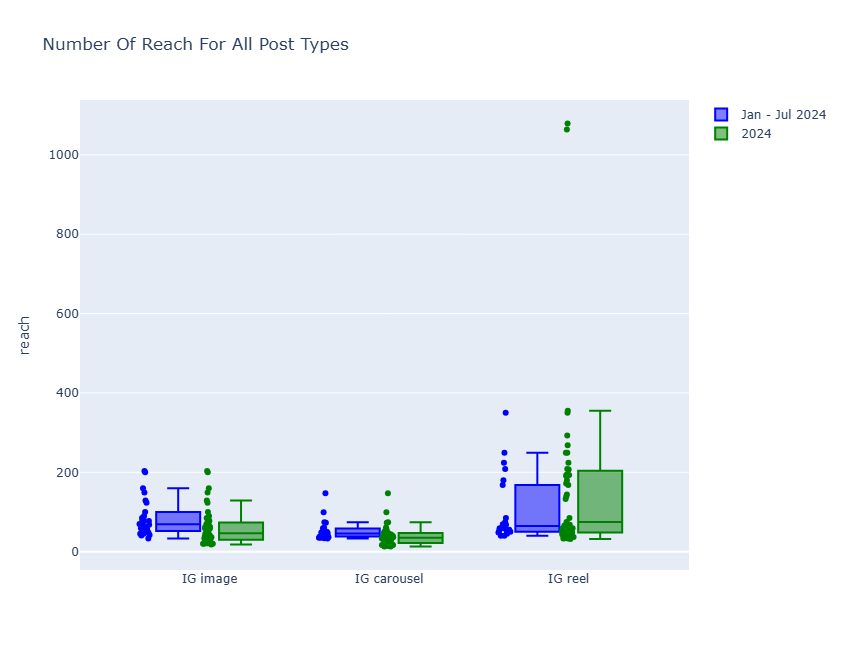

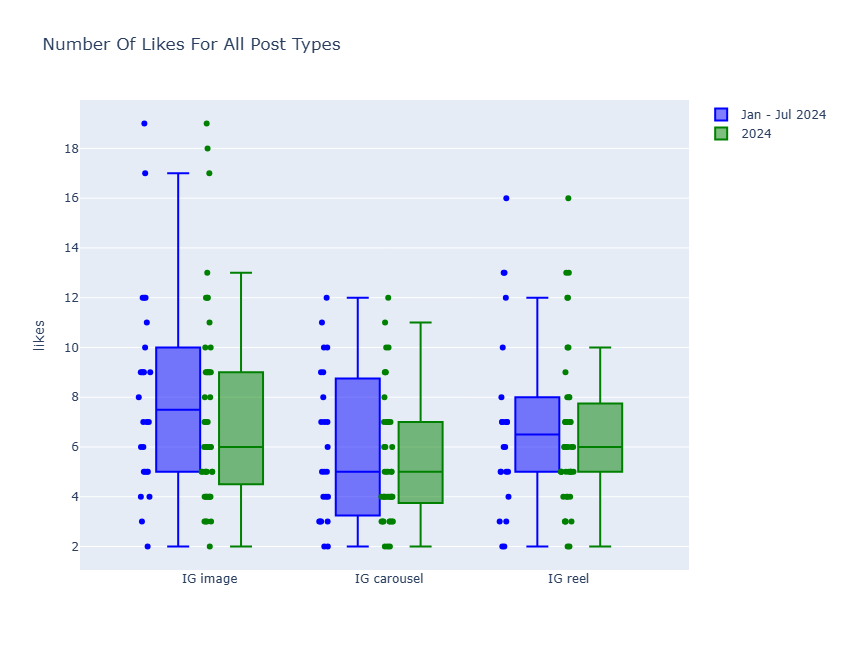

In [542]:
before_aug_df['stage'] = 1
df['stage'] = 2

priority_metrics = ['reach', 'likes']
title_5 = ['Jan - Jul 2024', '2024']
size_5 = [1100, 650]





for p in range(len(priority_metrics)):
    fig5 = go.Figure()
    
    fig5.add_trace(go.Box(
        y=before_aug_df[priority_metrics[p]],
        x=before_aug_df.type,
        name=title_5[0],
        marker_color='blue',
        boxpoints='all'
    ))
    fig5.add_trace(go.Box(
        y=df[priority_metrics[p]],
        x=df.type,
        name=title_5[1],
        marker_color='green',
        boxpoints='all'
    ))
    
    fig5.update_layout(
        yaxis=dict(
            title=dict(
                text=priority_metrics[p])
        ),
        boxmode='group', width=size_5[0], height=size_5[1],
        title=f'number of {priority_metrics[p]} for all post types'.title()
    )
    fig5.show()

In [548]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
